## Task 1
`predictive_maintenance_dataset.csv` is a file that contains parameters and settings (`operational_setting_1`, `operational_setting_2`, `sensor_measurement_1`, `sensor_measurement_2`, etc.) for many wind turbines. There is a column called `unit_number` which specifies which turbine it is, and one called `status`, in which a value of 1 means the turbine broke down that day, and 0 means it didn't. Your task is to create a model that, when fed with operational settings and sensor measurements (`unit_number` and `time_stamp` will *not* be fed in), outputs 1 if the turbine will break down within the next 40 days, and 0 if not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Data preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

In [4]:
# Balance the dataset
from imblearn.over_sampling import SMOTE

In [6]:
# Evaluation metrics
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score

In [7]:
# Classification models
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [187]:
# Regression models for imputation
from sklearn.ensemble import RandomForestRegressor

In [8]:
# Libraries for hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV

In [9]:
# Libraries for feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [10]:
# To save the final model
import _pickle as pickle

In [556]:
#Read data
clf_data = pd.read_csv("../results/processed_data/predictive_maintenance_dataset_processed.csv")

In [557]:
clf_data.shape

(144203, 27)

In [558]:
clf_data.head()

,unit_number,time_stamp,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,status
0,540,2016-05-01T12:00:00Z,42.0033,0.8400,High,445.00,549.11,1345.86,1123.35,3.91,5.70,138.25,2211.97,8311.89,1.02,41.64,130.38,2387.98,8075.70,9.3392,0.02,327.0,2212.0,100.00,10.59,6.4311,0
1,540,2016-05-02T12:00:00Z,10.0049,0.2513,High,489.05,604.12,1497.52,1299.13,10.52,15.48,394.31,2318.80,8770.06,1.26,NaN,371.99,2387.94,8126.65,8.5735,0.03,367.0,2319.0,100.00,28.54,17.2279,0
2,540,2016-05-03T12:00:00Z,20.0026,0.7011,High,491.19,606.99,1480.01,NaN,9.35,13.63,334.63,2323.80,8717.69,1.07,44.05,314.99,2387.97,8061.05,9.1776,0.02,364.0,2324.0,100.00,24.40,14.7659,0
3,540,2016-05-04T12:00:00Z,42.0023,0.8409,High,445.00,549.09,1346.29,1119.90,3.91,5.70,138.10,2211.95,8314.82,1.02,41.74,130.64,2387.98,8080.58,9.3504,0.02,NaN,NaN,100.00,10.74,6.2972,0
4,540,2016-05-05T12:00:00Z,25.0031,0.6200,NaN,462.54,536.18,1260.24,1038.22,7.05,9.01,175.42,1915.27,8003.96,0.94,36.50,164.24,2028.22,7866.67,10.8344,0.02,307.0,1915.0,84.93,14.34,8.5780,0


In [559]:
clf_data['operational_setting_3'].head()

0    High
1    High
2    High
3    High
4     NaN
Name: operational_setting_3, dtype: object

In [560]:
#Check if features are properly encoded
clf_data['operational_setting_3'].map( {'High':1, 'Low':0} ).head()

0    1.0
1    1.0
2    1.0
3    1.0
4    NaN
Name: operational_setting_3, dtype: float64

In [561]:
#Check the unique values for operational_setting_3
clf_data['operational_setting_3'].map( {'High':1, 'Low':0} ).unique()

array([  1.,  nan,   0.])

In [562]:
clf_data['operational_setting_3'] = clf_data['operational_setting_3'].map( {'High':1, 'Low':0} )

In [22]:
clf_data.head()

,unit_number,time_stamp,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,status
0,540,2016-05-01T12:00:00Z,42.0033,0.8400,1.0,445.00,549.11,1345.86,1123.35,3.91,...,2387.98,8075.70,9.3392,0.02,327.0,2212.0,100.00,10.59,6.4311,0
1,540,2016-05-02T12:00:00Z,10.0049,0.2513,1.0,489.05,604.12,1497.52,1299.13,10.52,...,2387.94,8126.65,8.5735,0.03,367.0,2319.0,100.00,28.54,17.2279,0
2,540,2016-05-03T12:00:00Z,20.0026,0.7011,1.0,491.19,606.99,1480.01,NaN,9.35,...,2387.97,8061.05,9.1776,0.02,364.0,2324.0,100.00,24.40,14.7659,0
3,540,2016-05-04T12:00:00Z,42.0023,0.8409,1.0,445.00,549.09,1346.29,1119.90,3.91,...,2387.98,8080.58,9.3504,0.02,NaN,NaN,100.00,10.74,6.2972,0
4,540,2016-05-05T12:00:00Z,25.0031,0.6200,NaN,462.54,536.18,1260.24,1038.22,7.05,...,2028.22,7866.67,10.8344,0.02,307.0,1915.0,84.93,14.34,8.5780,0


In [23]:
X = clf_data.drop(['time_stamp', 'unit_number','status'], axis=1)

In [108]:
feat = [np.abs(item)[item != 1] for item in [clf_data.corr()[item] for item in X.columns]]

In [188]:
# To view the unique elements per row to see number of categorical and continuous variables
[len(clf_data[items].unique()) for items in clf_data.columns]

[633,
 1788,
 670,
 112,
 3,
 7,
 1774,
 15056,
 19966,
 7,
 57,
 6154,
 1143,
 32463,
 22,
 767,
 5835,
 555,
 19459,
 12856,
 3,
 58,
 7,
 3,
 672,
 25780,
 2]

In [193]:
x1.isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: sensor_measurement_20, dtype: bool

In [263]:
y.head()[np.invert(y.isnull() & x1.isnull()).head()]

0     6.4311
1    17.2279
2    14.7659
3     6.2972
4     8.5780
Name: sensor_measurement_21, dtype: float64

In [204]:
np.array(y.isnull() & x1.isnull()).sum()

342

In [205]:
np.array(y.isnull() & x2.isnull()).sum()

365

In [209]:
np.array(y.isnull() & x1.isnull() & x2.isnull() & x3.isnull()).sum()

2

In [228]:
a = np.column_stack([y.head(), x1.head(), x2.head()])

In [238]:
a = pd.concat([y.head(), x1.head(), x2.head()], axis=1)

In [257]:
a[np.invert(a.iloc[:,[1,2]].isnull().sum(axis=1).astype('bool'))]

,sensor_measurement_21,sensor_measurement_20,sensor_measurement_7
0,6.4311,10.59,138.25
1,17.2279,28.54,394.31
2,14.7659,24.40,334.63
3,6.2972,10.74,138.10
4,8.5780,14.34,175.42


In [297]:
from sklearn import utils
from sklearn import preprocessing
# https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python

In [662]:
# Set refit
refit = True

fixed_values = {}   

all_data = clf_data.copy()
new_data = pd.DataFrame()

for c,columns in enumerate(feat):
    
    col_name = pd.DataFrame(columns).columns[0]
    
    top_corr = np.argmax(np.abs(columns))
    second_corr = pd.DataFrame(columns).sort_values(col_name).iloc[-2].name
    third_corr = pd.DataFrame(columns).sort_values(col_name).iloc[-3].name
    
    features = [top_corr, second_corr, third_corr]
    
    y = clf_data.loc[:, col_name]
    x1 = clf_data.loc[:, top_corr]
    x2 = clf_data.loc[:, second_corr]
    x3 = clf_data.loc[:, third_corr]
    
    if refit:        
        for number, item in enumerate([x1, x2, x3]):   
            X_train = item[np.invert(y.isnull() | item.isnull())].values.reshape(-1, 1)
            y_train = y[np.invert(y.isnull() | item.isnull())]

            #Select Classifier or Regression model based on the number of unique values
            if(len(y.unique()) <= 7):
                rf_model = RandomForestClassifier()
                if y_train[0] < 1 : 
                    y_train = y_train*100
                y_train = y_train.astype('int')

                fixed_values[col_name] = mode(y)
    
            else:
                rf_model = RandomForestRegressor()
                
                fixed_values[col_name] = np.mean(y)

            # Fitting Random forest model
            rf_model.fit(X_train, y_train)


            with open('../results/pickles/{}-{}x.pickle'.format(col_name, number), 'wb') as save_model:
                pickle.dump(rf_model, save_model)
            
        with open('../results/pickles/fixed_values.pickle', 'wb') as save_model:
            pickle.dump(fixed_values, save_model)


    # Data missing selected feature
    fallback_1 = y.isnull() & np.invert(x1.isnull())
    fallback_2 = y.isnull() & x1.isnull() & np.invert(x2.isnull())
    fallback_3 = y.isnull() & x1.isnull() &  x2.isnull() & np.invert(x3.isnull())
    fallback_4 = y.isnull() & x1.isnull() &  x2.isnull() & x3.isnull()
    fallbacks = [fallback_1, fallback_2, fallback_3, fallback_4]
    
    complete_data = all_data.loc[np.invert(y.isnull())]

    for count, item in enumerate(fallbacks):
        if item is not None and (count < 3):
            loop_data = all_data.loc[item].copy()
            with open('../results/pickles/{}-{}x.pickle'.format(col_name, count), 'rb') as load_model:
                rf_model = pickle.load(load_model)
            
            x_data = loop_data.loc[:, features[count]].values.reshape(-1, 1)

            #Predicting using Random forest model
            y_data = rf_model.predict(x_data)
                
            loop_data.loc[:,col_name] = y_data
    
            complete_data = complete_data.append(loop_data)
            
        else:
            
            #warnings.warn("There are more than 3 missing values in one or more records")

            loop_data = all_data.loc[item].copy()
            
            with open('../results/pickles/fixed_values.pickle'.format(col_name, count), 'rb') as load_model:
                fixed_values = pickle.load(load_model)

            # Imputing with preset values as more than 4 values are missing.
            y_data = fixed_values[col_name]
            loop_data.loc[:,col_name] = y_data
            complete_data = complete_data.append(loop_data)
            
    all_data = complete_data
             
    print("====Loop {} - {} Completed====".format(c, col_name))
    
all_data = all_data.sort_index()


====Loop 0 - operational_setting_1 Completed====
====Loop 1 - operational_setting_2 Completed====
====Loop 2 - operational_setting_3 Completed====
====Loop 3 - sensor_measurement_1 Completed====
====Loop 4 - sensor_measurement_2 Completed====
====Loop 5 - sensor_measurement_3 Completed====
====Loop 6 - sensor_measurement_4 Completed====
====Loop 7 - sensor_measurement_5 Completed====
====Loop 8 - sensor_measurement_6 Completed====
====Loop 9 - sensor_measurement_7 Completed====
====Loop 10 - sensor_measurement_8 Completed====
====Loop 11 - sensor_measurement_9 Completed====
====Loop 12 - sensor_measurement_10 Completed====
====Loop 13 - sensor_measurement_11 Completed====
====Loop 14 - sensor_measurement_12 Completed====
====Loop 15 - sensor_measurement_13 Completed====
====Loop 16 - sensor_measurement_14 Completed====
====Loop 17 - sensor_measurement_15 Completed====
====Loop 18 - sensor_measurement_16 Completed====
====Loop 19 - sensor_measurement_17 Completed====
====Loop 20 - senso

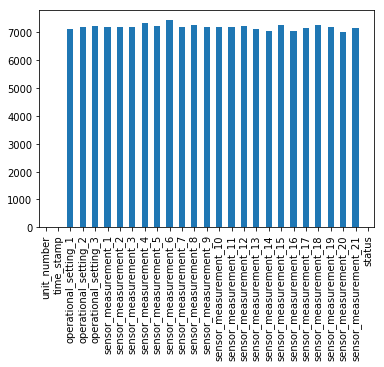

In [664]:
clf_data.isnull().sum().plot(kind='bar')

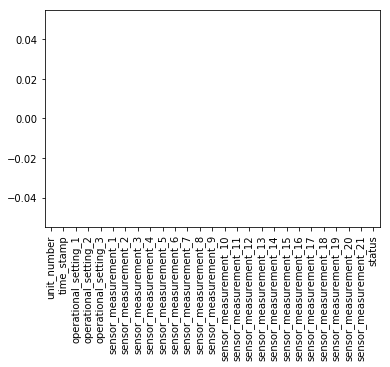

In [626]:
all_data.isnull().sum().plot(kind='bar')

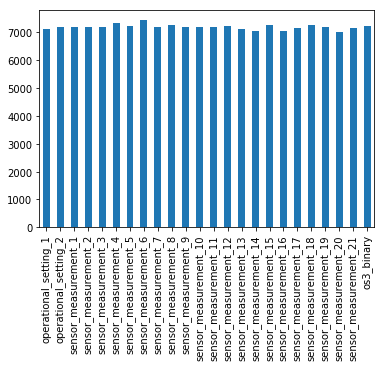

In [19]:
#Visualize the missing data for all fields
X.isnull().sum().plot(kind='bar')

In [20]:
# Imputing missing values in categorical variables
data_imputer = Imputer(strategy='most_frequent')
X['os3_binary'] = data_imputer.fit_transform(X['os3_binary'].reshape(-1,1))

/Users/avinash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# Checking the unique values for os3
X['os3_binary'].unique()

array([ 1.,  0.])

In [22]:
# Impute the missing continuous data
data_imputer = Imputer()
X_imp = data_imputer.fit_transform(X)

In [23]:
X_imp = pd.DataFrame(X_imp, columns=X.columns)

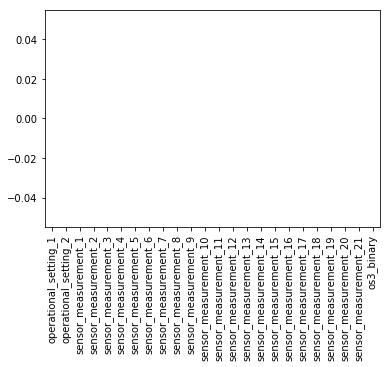

In [24]:
#Checking if there are still any missing data
X_imp.isnull().sum().plot(kind='bar')

In [25]:
y = clf_data['status']

In [28]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.15, random_state=7)

#Upsampling using imbalance-learn
#http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/over-sampling/plot_random_over_sampling.html#sphx-glr-auto-examples-over-sampling-plot-random-over-sampling-py
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train)

# Train validation split
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=7)

In [29]:
def evaluate(model):
    '''
    Function to evaluate the performance on training and validation sets.
    Args:
        model: Sk-learn model with score and predict methods
    Returns:
        None
    '''
    print("-----Training-----", "\n")
    # Accuracy
    train_score = model.score(X_train, y_train)
    print("Train Accuracy: ", train_score)
    # Recall Score
    train_recall = recall_score(y_pred = model.predict(X_train), y_true=y_train)
    print("Train Recall: ", train_recall)
    # Confusion Matrix
    print("Train Confusion Matrix")
    cm_train = pd.DataFrame(confusion_matrix(y_pred = model.predict(X_train), y_true=y_train))
    print(cm_train, "\n")
    
    print("-----Validation-----", "\n")
    # Accuracy
    val_score = model.score(X_val, y_val)
    print("Test Accuracy: ", val_score)
    # Recall Scores
    val_recall = recall_score(y_pred = model.predict(X_val), y_true=y_val)
    print("Test Recall: ", val_recall)
    # Confusion Matrix
    print("Test Confusion Matrix")
    cm_val = pd.DataFrame(confusion_matrix(y_pred = model.predict(X_val), y_true=y_val))
    print(cm_val)

def evaluate_test(model):
    '''
    Function to evaluate the performance on testing sets.
    Args:
        model: Sk-learn model with score and predict methods
    Returns:
        None
    '''
    print("-----Testing-----", "\n")
    # Accuracy
    test_score = model.score(X_test, y_test)
    print("Train Accuracy: ", test_score)
    # Recall Score
    test_recall = recall_score(y_pred = model.predict(X_test), y_true=y_test)
    print("Test Recall: ", test_recall)
    # Confusion Matrix
    print("Test Confusion Matrix")
    cm_test = pd.DataFrame(confusion_matrix(y_pred = model.predict(X_test), y_true=y_test))
    print(cm_test, "\n")

## Using Logistic Regression

In [30]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
evaluate(lr_clf)

-----Training----- 

Train Accuracy:  0.81456510005
Train Recall:  0.831381823447
Train Confusion Matrix
       0      1
0  82892  21009
1  17468  86127 

-----Validation----- 

Test Accuracy:  0.819514992627
Test Recall:  0.835716607085
Test Confusion Matrix
       0      1
0  14580   3576
1   3033  15429


## Using SGD

In [32]:
sgd_clf = SGDClassifier(penalty="l1")
sgd_clf.fit(X_train, y_train)

/Users/avinash/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [33]:
evaluate(sgd_clf)

-----Training----- 

Train Accuracy:  0.739219069283
Train Recall:  0.611612529562
Train Confusion Matrix
       0      1
0  90025  13876
1  40235  63360 

-----Validation----- 

Test Accuracy:  0.739390463706
Test Recall:  0.615913768822
Test Confusion Matrix
       0      1
0  15704   2452
1   7091  11371


## Using Random Forest

In [34]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
evaluate(rf_clf)

-----Training----- 

Train Accuracy:  0.99993252882
Train Recall:  0.999961388098
Train Confusion Matrix
        0       1
0  103891      10
1       4  103591 

-----Validation----- 

Test Accuracy:  0.997869900049
Test Recall:  0.998375040624
Test Confusion Matrix
       0      1
0  18108     48
1     30  18432


## XGBoost

In [36]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [37]:
evaluate(xgb)

-----Training----- 

Train Accuracy:  0.977599568184
Train Recall:  0.995221777113
Train Confusion Matrix
       0       1
0  99748    4153
1    495  103100 

-----Validation----- 

Test Accuracy:  0.976841990278
Test Recall:  0.995125121872
Test Confusion Matrix
       0      1
0  17398    758
1     90  18372


# GradientBoostingClassifier

In [38]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [39]:
evaluate(gbc_clf)

-----Training----- 

Train Accuracy:  0.982043027335
Train Recall:  0.996447705005
Train Confusion Matrix
        0       1
0  100543    3358
1     368  103227 

-----Validation----- 

Test Accuracy:  0.981238735048
Test Recall:  0.995991766872
Test Confusion Matrix
       0      1
0  17543    613
1     74  18388


### Selecting the top 2 models and tuning parameters.

## Hyperparameter tuning for RandomForestClassifier

In [40]:
parameters = {'n_estimators': np.arange(100,300,50),
              'max_features': ['auto', 'sqrt'],
              'max_depth': [None, 5, 7, 10]}

In [41]:
rf_clf = RandomForestClassifier()
opt_rfc = RandomizedSearchCV(rf_clf, parameters, n_jobs = 4)
opt_rfc.fit(X_train,y_train)
print(opt_rfc.best_params_)

{'n_estimators': 100, 'max_features': 'auto', 'max_depth': None}


In [44]:
rfc_opt = RandomForestClassifier(max_depth = None, max_features = 'auto', n_estimators = 250)
rfc_opt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
evaluate(rfc_opt)

-----Training----- 

Train Accuracy:  1.0
Train Recall:  1.0
Train Confusion Matrix
        0       1
0  103901       0
1       0  103595 

-----Validation----- 

Test Accuracy:  0.997596810312
Test Recall:  0.998645867187
Test Confusion Matrix
       0      1
0  18093     63
1     25  18437


## Hyper Parameter Optimization for GradientBoostingClassifier

In [46]:
parameters = {'learning_rate' : np.logspace(-2,0,num=3),
              'n_estimators': [100, 200, 250], 
              'max_depth':[3,5,7], 
              'max_features': ['auto', 'sqrt']}

In [47]:
gbc = GradientBoostingClassifier()
opt_gbc = RandomizedSearchCV(gbc, parameters, n_jobs = -1, scoring= 'recall', n_iter=9)
opt_gbc.fit(X_train,y_train)
print(opt_gbc.best_params_)
print("Accuracy:", opt_gbc.best_score_)
print("Error:", 1- opt_gbc.best_score_)

{'n_estimators': 250, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.10000000000000001}
Accuracy: 0.999034702451
Error: 0.000965297548711


In [48]:
gbc_clf = GradientBoostingClassifier(n_estimators = 250, max_depth = 3, learning_rate = 0.1, max_features='sqrt')
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [49]:
evaluate(gbc_clf)

-----Training----- 

Train Accuracy:  0.988515441262
Train Recall:  0.999208456007
Train Confusion Matrix
        0       1
0  101600    2301
1      82  103513 

-----Validation----- 

Test Accuracy:  0.988038669507
Test Recall:  0.998862528437
Test Confusion Matrix
       0      1
0  17739    417
1     21  18441


## Feature Selection 

#### Using Extra trees classifier and L1 for feature selection

In [50]:
clf_pipeline = Pipeline([
  ('feature_selection', SelectFromModel(ExtraTreesClassifier(n_estimators=250, random_state=7))),
  ('classification', RandomForestClassifier())
])
clf_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_sam...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [51]:
evaluate(clf_pipeline)

-----Training----- 

Train Accuracy:  0.9998554189
Train Recall:  0.999961388098
Train Confusion Matrix
        0       1
0  103875      26
1       4  103591 

-----Validation----- 

Test Accuracy:  0.996231361625
Test Recall:  0.998754197812
Test Confusion Matrix
       0      1
0  18041    115
1     23  18439


#### Using LinearSVC and L1 for feature selection

In [53]:
svc_pipeline = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual = False))),
  ('classification', RandomForestClassifier())
])
svc_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
        norm_order=1, prefit...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [54]:
evaluate(svc_pipeline)

-----Training----- 

Train Accuracy:  0.99990843197
Train Recall:  0.99991312322
Train Confusion Matrix
        0       1
0  103891      10
1       9  103586 

-----Validation----- 

Test Accuracy:  0.997760664154
Test Recall:  0.998212544686
Test Confusion Matrix
       0      1
0  18107     49
1     33  18429


#### Using Logistic Regression and L1 for feature selection

In [55]:
lr_pipeline = Pipeline([
  ('feature_selection', SelectFromModel(LogisticRegression(penalty="l1"))),
  ('classification', GradientBoostingClassifier(n_estimators = 250, max_depth = 5, learning_rate = 0.1))
])
lr_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))])

In [56]:
evaluate(lr_pipeline)

-----Training----- 

Train Accuracy:  0.996973435632
Train Recall:  0.999816593465
Train Confusion Matrix
        0       1
0  103292     609
1      19  103576 

-----Validation----- 

Test Accuracy:  0.994783986018
Test Recall:  0.998808363124
Test Confusion Matrix
       0      1
0  17987    169
1     22  18440


# Test scores for the final model

In [57]:
evaluate_test(svc_pipeline)

-----Testing----- 

Train Accuracy:  0.993435347418
Test Recall:  0.35593220339
Test Confusion Matrix
       0   1
0  21447  66
1     76  42 



In [58]:
roc_auc_score(y_score=svc_pipeline.predict(X_test), y_true=y_test)

0.67643214548239261

## Saving final model

In [59]:
save_classifier = open("task1_model.pickle", "wb")
pickle.dump(svc_pipeline, save_classifier)
save_classifier.close()